In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
sp_data = pd.read_csv('./superstore_data.csv')
sp_data.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


Dữ liệu này được thu thập trong chiến dịch năm ngoái.
Mô tả dữ liệu như sau;

`Response` (mục tiêu) - 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch gần nhất, 0 nếu không

`ID` - ID duy nhất của từng khách hàng

`Year_Birth` - Tuổi của khách hàng

`Complain` - 1 nếu khách hàng khiếu nại trong 2 năm qua

`Dt_Customer` - ngày khách hàng đăng ký với công ty

`Education` - trình độ học vấn của khách hàng

`Marital` - tình trạng hôn nhân của khách hàng

`Kidhome` - số trẻ nhỏ trong hộ gia đình của khách hàng

`Teenhome` - số thanh thiếu niên trong hộ gia đình của khách hàng

`Income` - thu nhập hộ gia đình hàng năm của khách hàng

`MntFishProducts` - số tiền chi cho các sản phẩm cá trong 2 năm qua

`MntMeatProducts` - số tiền chi cho các sản phẩm thịt trong 2 năm qua 

`MntFruits` - số tiền chi cho các sản phẩm trái cây trong 2 năm qua 

`MntSweetProducts` - số tiền chi cho các sản phẩm ngọt trong 2 năm qua 

`MntWines` - số tiền chi cho các sản phẩm rượu trong 2 năm qua 

`MntGoldProds` - số tiền chi cho các sản phẩm vàng trong 2 năm qua 

`NumDealsPurchases` - số lần mua hàng được giảm giá 

`NumCatalogPurchases` - số lượng giao dịch mua hàng được thực hiện thông qua danh mục (mua hàng hóa để vận chuyển qua đường bưu điện) 

`NumStorePurchases` - số lượng giao dịch mua hàng được thực hiện trực tiếp tại cửa hàng 

`NumWebPurchases` - số lượng giao dịch mua hàng được thực hiện thông qua trang web của công ty 

`NumWebVisitsMonth` - số lượt truy cập vào trang web của công ty trong tháng qua 

`Recency` - số ngày kể từ lần mua hàng cuối cùng


In [13]:
sp_data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


### thay đổi độ tuổi
`year_birth` - năm hiện tại là 2014

In [14]:
sp_data['Year_Birth'] = 2014 - sp_data['Year_Birth'] 
print(sp_data['Year_Birth'])

0       44
1       53
2       56
3       47
4       25
        ..
2235    38
2236    37
2237    38
2238    36
2239    45
Name: Year_Birth, Length: 2240, dtype: int64


### Price - cột chi trả


`Sum_Price` =   `MntFishProducts` + `MntMeatProducts` + `MntFruits` + `MntSweetProducts` + `MntWines` + `MntGoldProds`

In [15]:
sp_data["Sum_Price"] = sp_data['MntFishProducts'] + sp_data['MntMeatProducts'] +sp_data['MntFruits'] +sp_data['MntSweetProducts'] +sp_data['MntWines'] +sp_data['MntGoldProds']
sp_data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Sum_Price
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,45.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,602.249288
min,0.000000,18.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,37.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,68.750000
50%,5458.500000,44.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,396.000000
75%,8427.750000,55.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,1045.500000
max,11191.000000,121.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,2525.000000


In [16]:
YearBirth = sp_data['Year_Birth']
YearBirth.describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Year_Birth, dtype: float64

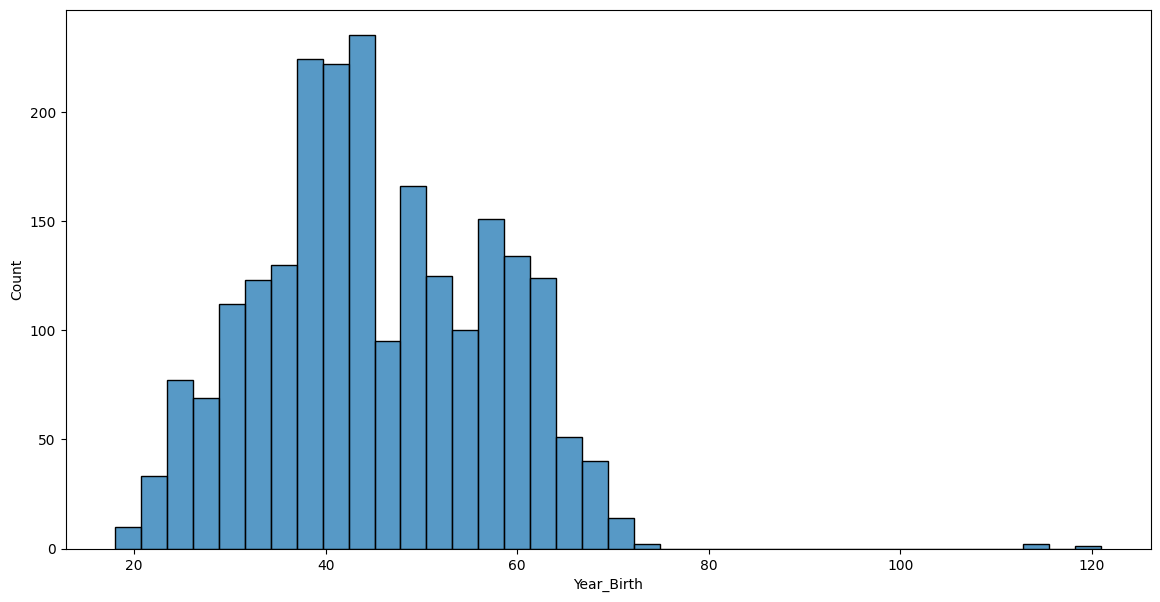

In [17]:
plt.figure(figsize=(14,7))
sns.histplot(x=YearBirth)
plt.show()


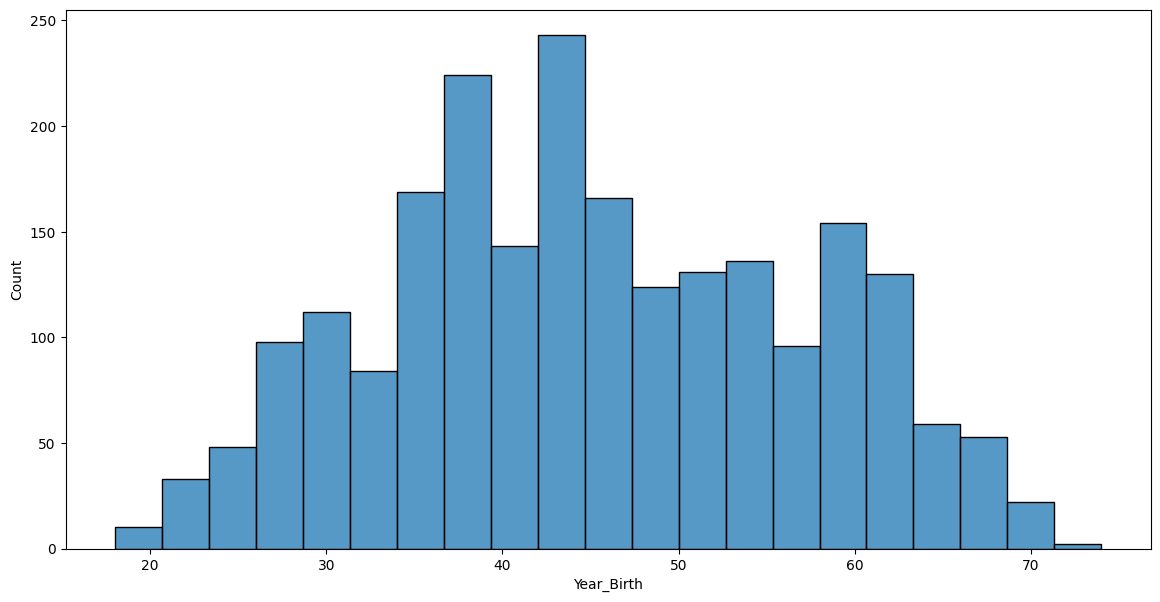

count    2237.000000
mean       45.098346
std        11.701917
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Year_Birth, dtype: float64

In [18]:
sp_data = sp_data[sp_data['Year_Birth'] < 100 ]
YearBirth = sp_data['Year_Birth']
plt.figure(figsize=(14,7))
sns.histplot(x=YearBirth)
plt.show()

YearBirth.describe()

In [19]:
sp_data = sp_data[sp_data['Income'] < 125000 ]


In [20]:
sp_data.to_csv("SuperSt_data.csv")